In [50]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
#loading data into numpy array
mnist = datasets.load_digits()
label=np.array(mnist.target)
#label = np.reshape(label,(label.size,1))
mnist = np.array(mnist.data)
#adding the labels
#mnist=np.append(mnist,label,axis=1)
#shuffling the data for better distibution
#np.random.shuffle(mnist)

In [90]:
numExamples = len(mnist) # 1797 examples
numFeatures = len(mnist[0]) # 64 features
numLabels = 10 # digits from 0 to 9


creating the training data sets for one vs all

In [55]:
#one_all_label[i] contains the labels for classifying number 'i' (if label[j]=k then one_all_label[k][j]=1 else one_all_label[k][j]=0)
# '0': data0, ... datan
# '1': data0, ... datan
# ...
# '9': data0, ... datan
one_all_labels=np.zeros((numLabels,numExamples))
for i in range(numLabels):
  for j in range(len(label)):
    if label[j]==i:
      one_all_labels[i,j]=1


In [56]:
#inorder to match the data format labels have to be transposed
# '0'  '1'  ..... '9'
#  d    d   .....  d
#  a    a          a
#  t    t          t
#  a    a          a
#  0    1        n
one_all_labels=one_all_labels.T

In [58]:
#check
print(np.sum(label==7))
print(np.sum(one_all_labels[:,7]==1))
print(one_all_labels.shape)

179
179
(1797, 10)


splitting the data

In [74]:

train=mnist[0:int(0.7*len(mnist)), :]
train_label=one_all_labels[0:int(0.7*len(mnist))] # train labels in on vs all format
test=mnist[int(0.7*len(mnist)): , :]
test_label=one_all_labels[int(0.7*len(mnist)):] # test labels in on vs all format


org_label_train=label[0:int(0.7*len(mnist))] #train labels in original format
org_label_test=label[int(0.7*len(mnist)):] #test labels in original format

In [63]:
print(len(train_label))
print(train.shape)
print(test.shape)
print(test_label.shape)

1257
(1257, 64)
(540, 64)
(540, 10)


function gets test data, train data and it's labels as input.
trains a logistic regression classifier for each column of train labels (is the numer 0 or not,..., is the number 9 or not)


In [81]:
def get_label(train,one_vs_all_train_label,test):
  m_train=len(train)
  m_test=len(test)
  correct=0
  result=np.zeros((numLabels,m_test))
  predicted_label=np.zeros(m_test)
  lr=LogisticRegression()
  for i in range(numLabels):
    lr.fit(train,one_vs_all_train_label[:,i].reshape(m_train,1))
    #predict_prob[:,1] is the probablity of each data being equal to number 'i'
    predict_prob=lr.predict_proba(test)
    result[i]=predict_prob[:,1] #the probablity of being 1 (1 means equal to 'i') ; resuly of the ith classifier
  for i in range(m_test):
    #predicted label is the maximum of the result (probablity) of 10 classifiers
    predicted_label[i] = np.where(result[:,i] == np.amax(result[:,i]))[0] #max probablity for each data
  return predicted_label



getting error and confusion matrix

In [85]:
def display_res(train,one_vs_all_train_label,test,org_test_label):
  correct=0
  m_test=len(test)
  #comparing actual labels with predicted labels
  predicted_test_label=get_label(train,one_vs_all_train_label,test)
  for i in range(m_test):
    if org_test_label[i]==predicted_test_label[i]:
      correct=correct+1
  print("error: "+str((m_test-correct)/m_test) )
  print(confusion_matrix(org_test_label, predicted_test_label, labels=range(numLabels)))

training error and confusion matrix

In [86]:
#training error
display_res(train,train_label,train,org_label_train)

error: 0.0015910898965791568
[[125   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   1   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   0 130   0   0   0   0   0   0]
 [  0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   0   0 126   0   0   0   0]
 [  0   0   0   0   0   0 127   0   0   0]
 [  0   0   0   0   0   0   0 125   0   0]
 [  0   0   0   0   0   0   1   0 121   0]
 [  0   0   0   0   0   0   0   0   0 125]]


testing error and confusion matrix

In [87]:
#test errror
display_res(train,train_label,test,org_label_test)

error: 0.1037037037037037
[[51  0  0  0  0  0  1  0  1  0]
 [ 0 44  0  2  0  0  0  0  2  5]
 [ 3  0 49  0  0  0  0  0  0  1]
 [ 0  1  0 42  0  2  0  2  6  0]
 [ 0  2  0  0 52  0  2  0  0  1]
 [ 0  2  1  0  0 51  2  0  0  0]
 [ 0  1  0  0  0  0 52  0  1  0]
 [ 0  1  0  0  0  0  0 49  3  1]
 [ 0  6  0  0  1  0  0  0 45  0]
 [ 1  4  0  0  0  0  0  1  0 49]]


displaying predicted and original label for 25 test set items

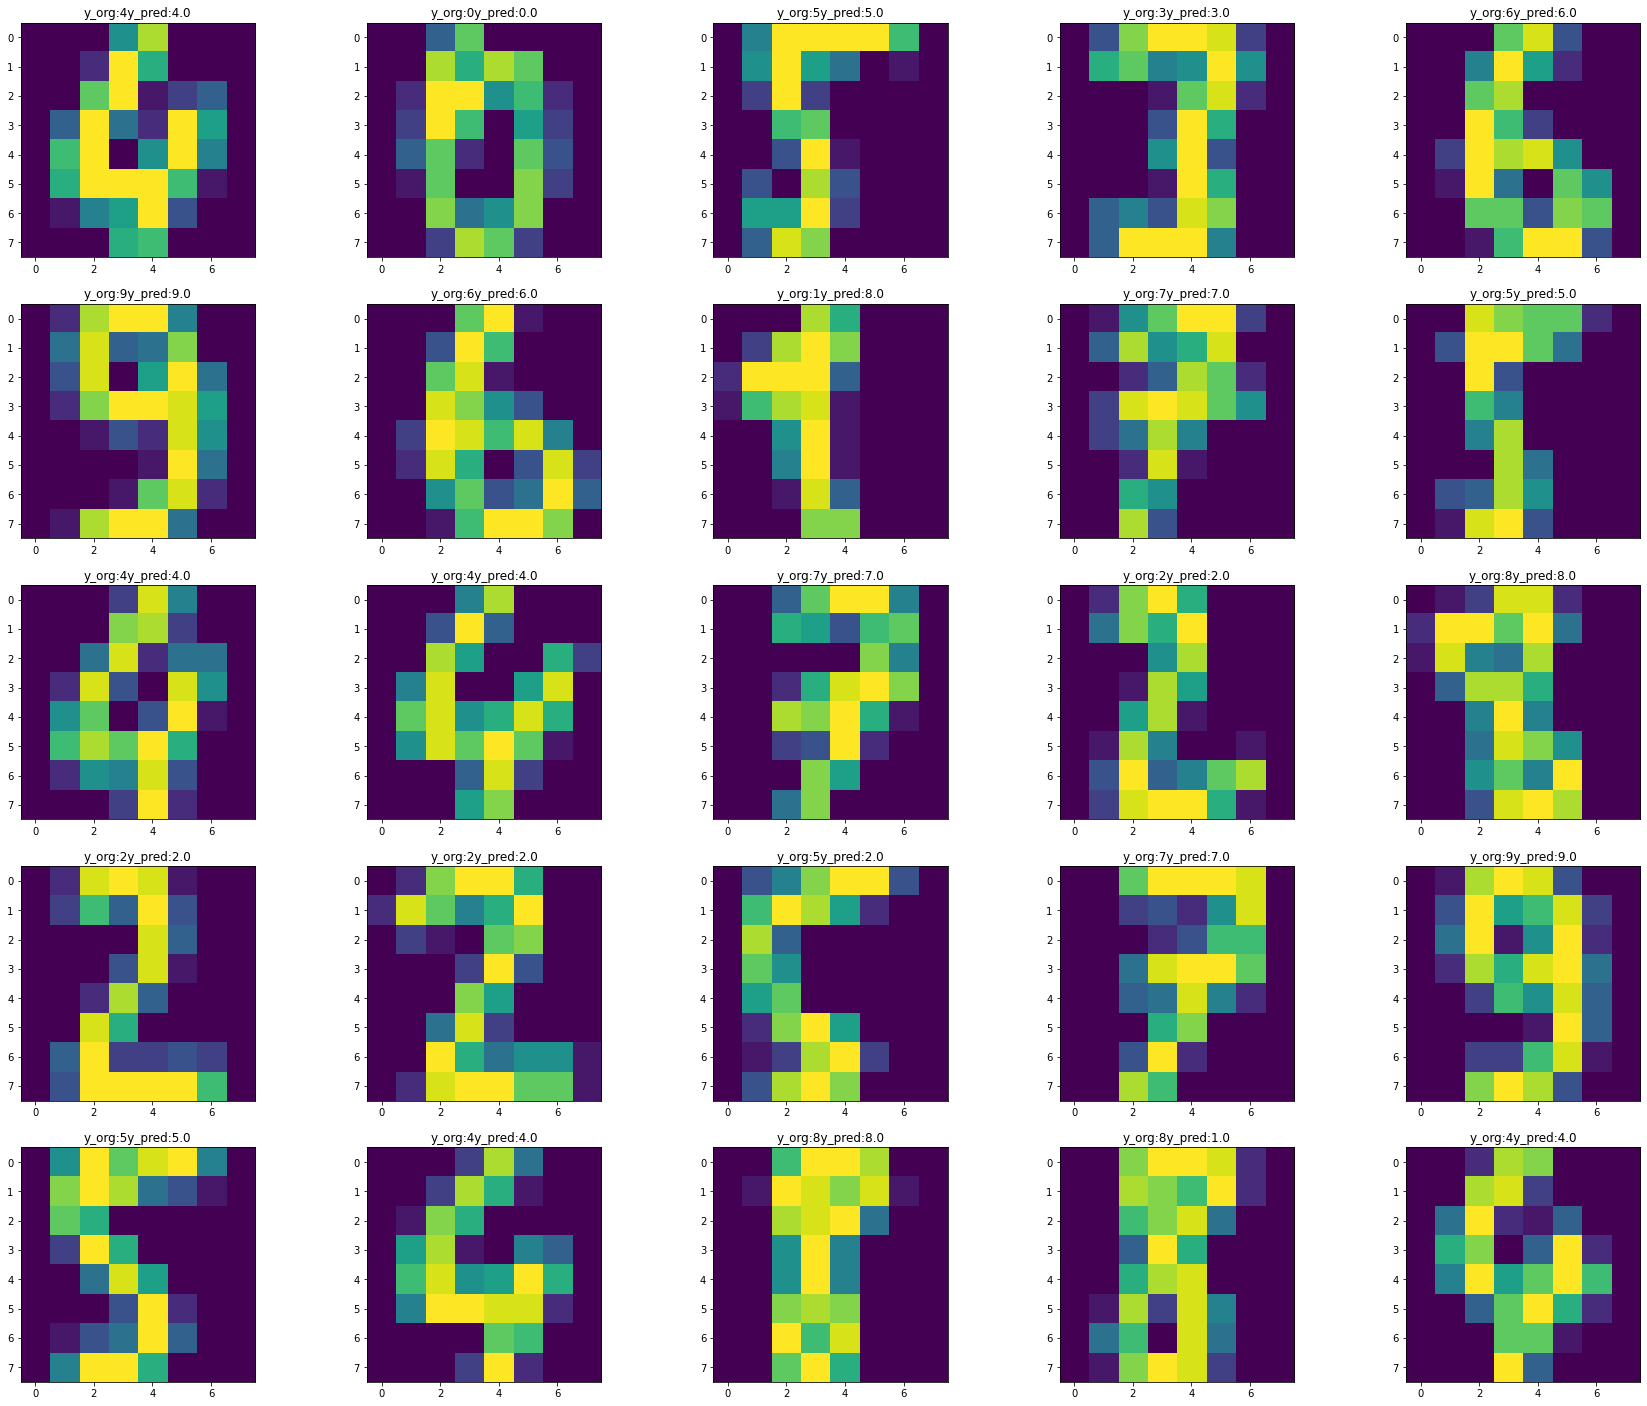

In [92]:
test1 = test[0:25, :]
train1=train
correct_prediction=0
predicted_labels=get_label(train1,train_label,test1)

#5x5 subplots for 25 images
fig, axis = plt.subplots(5, 5)
column= 0
for i in range(len(test1)):
  column = column % 5
  axis[int(i/5), column].imshow(test1[i].reshape(8, 8))
  axis[int(i/5), column].set_title( "y_org:"+ str(org_label_test[i])+ "y_pred:" + str(predicted_labels[i]) )
  column=column+1
fig.set_size_inches(30, 25)

plt.show()

ج)روش نزدیک‌ ترین همسایه برای این مجموعه داده در تست بهتر و در آموزش بدتر عمل می‌کرد.

knn train error: 0.008

---


knn test error: 0.016

---


LR train error: 0.001

---


LR test error: 0.103

د)  اگر ۱۰ کلاس با داده‌های متوازن داشته باشیم با این روش جداسازها داده‌های با نسبت ۱۰ به ۹۰ را باید جدا کنند و داده‌ها نامتوزن می‌شوند؛ برای حل این مشکل می توان از روش یک به یک استفاده کرد که داده ها اگر خودشان نامتوازن نباشند، به  شکل دوتایی (۱۰ به ۱۰ ) مقایسه و جدا می‌شوند. و توازن د         ا            ریم